In [2]:
import sympy as sp
c, v = sp.symbols('c v')
K = sp.MatrixSymbol('K', 2, 2).as_explicit()

def generateEq(origin, target, K):
    n = len(origin)
    vecOrigin = sp.Matrix(origin).reshape(n, 1)
    vecTarget = sp.Matrix(target).reshape(n, 1)
    eq = (vecTarget.T * K * vecOrigin)
    return eq

In [3]:
rst = sp.solve([
    generateEq([sp.I, -c], [sp.I * (-c), 1], K),
    generateEq([sp.I,  c], [sp.I * c, 1], K),
    generateEq([sp.I,  v], [0, 1], K),
    generateEq([sp.I,  0], [sp.I * (-v), 1], K)
], K)

dict_values([K[1, 1], -I*v*K[1, 1]/c**2, I*v*K[1, 1]])

In [6]:
k = sp.symbols('k')
m1 = sp.Matrix([[k, -sp.I * v * k / c**2], [sp.I * v * k, k]])
m2 = sp.Matrix([[k, sp.I * v * k / c**2], [-sp.I * v * k, k]])
I = sp.eye(*m1.shape)
display(m2 * m1, I)
ret = sp.solve([m2 * m1 - I], k)
ret

Matrix([
[k**2 - k**2*v**2/c**2,                     0],
[                    0, k**2 - k**2*v**2/c**2]])

Matrix([
[1, 0],
[0, 1]])

[(-c*sqrt(-1/((-c + v)*(c + v))),), (c*sqrt(-1/((-c + v)*(c + v))),)]

# 相对论中的简谐运动-周期变长

In [1]:
import sympy as sp
# 相对论弹簧振子
k, m0, c = sp.symbols("k m_0 c", constants=True)
k, m0, c = 1, 1, 1
t = sp.symbols("t")
p = sp.Function("p")(t)
v = p / sp.sqrt(m0**2 + p**2 / c**2)
eq = sp.Eq(p.diff(t, 2), -k * v)
display(v, eq)

p(t)/sqrt(p(t)**2 + 1)

Eq(Derivative(p(t), (t, 2)), -p(t)/sqrt(p(t)**2 + 1))

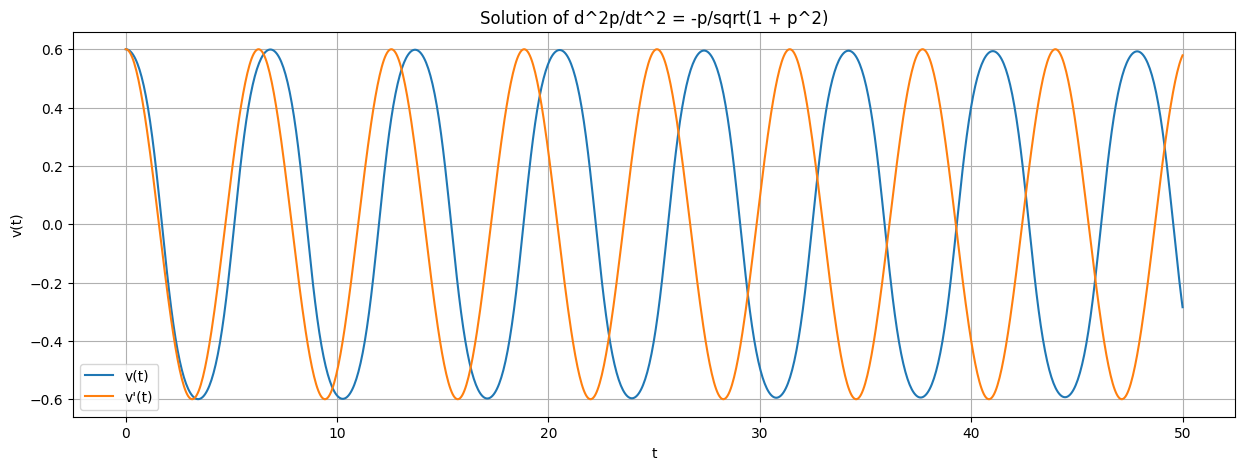

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp


# 定义方程组
def f(t, y):
    p, dp = y
    dpdt = dp
    ddpdt = -p / np.sqrt(1 + p**2)
    return [dpdt, ddpdt]


# 初始条件
p0 = 0.75
dp0 = 0.0
y0 = [p0, dp0]

# 时间范围
t_span = (0, 50)

# 求解微分方程
sol = solve_ivp(f, t_span, y0, t_eval=np.linspace(t_span[0], t_span[1], 1000))

# 绘制结果
t, p = sol.t, sol.y[0]
v = p / np.sqrt(1 + p**2)
v2 = 0.6 * np.cos(t)
plt.figure(figsize=(15, 5))
plt.plot(t, v, label="v(t)")
plt.plot(t, v2, label="v'(t)")
plt.xlabel("t")
plt.ylabel("v(t)")
plt.title("Solution of d^2p/dt^2 = -p/sqrt(1 + p^2)")
plt.legend()
plt.grid()
plt.show()